In [3]:
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import docx

# Load the Excel file
Sheet1 = 'Sheet1'
excel_file1 = 'corrected_series_India.xlsx'  ### country
df = pd.read_excel(excel_file1, sheet_name=Sheet1)

In [2]:
import os
os.chdir('C:/Users/user/Downloads')

In [4]:
breaksdf = pd.read_excel("BreaksForPY.xlsx")

In [5]:
breaksdf = breaksdf.sort_values(by = ["company", "Date"])[24:].reset_index(drop=True)    ### country

In [6]:
breaksdict = {}
companiesset = set(breaksdf["company"])

In [7]:
for i in companiesset:
    dateslst = []
    for j in breaksdf[(breaksdf["company"] == i)]["Date"]:
        dateslst.append(j)
    for j in range(4 - len(dateslst)):
        dateslst.append(None)
    breaksdict[i] = dateslst
breaksdf2 = pd.DataFrame(breaksdict)
breaksdf2

India_40   India_69   India_67   India_36  India_206  India_124  \
0 2013-01-04 2012-01-23 2012-05-30 2012-05-31 2011-10-07 2018-02-20   
1 2021-04-15 2020-03-10 2020-03-10 2014-09-23 2014-11-06 2020-03-05   
2        NaT        NaT        NaT        NaT        NaT        NaT   
3        NaT        NaT        NaT        NaT        NaT        NaT   

   India_153    India_8  India_160  India_172  India_136  India_220  India_199  
0 2013-11-18 2018-02-16 2015-04-16 2018-02-28 2013-11-14 2012-05-31 2011-11-02  
1 2015-12-28 2020-03-17 2020-03-05 2020-02-03 2016-01-01 2014-11-06 2013-03-28  
2 2018-02-06        NaT        NaT        NaT        NaT        NaT 2015-06-25  
3 2020-03-17        NaT        NaT        NaT        NaT        NaT        NaT

In [8]:
df

Unnamed: 0  India_8  India_36  India_40  India_67  India_69  India_124  \
0              0    105.0     133.0    105.00    187.50    187.50       65.0   
1              1    105.0     129.5    105.00    187.66    187.66       63.5   
2              2    105.0     122.0    105.00    180.00    180.00       60.0   
3              3    105.0     122.0    105.00    181.50    181.50       60.0   
4              4    100.0     120.5    100.00    177.33    177.33       59.0   
...          ...      ...       ...       ...       ...       ...        ...   
3660        3660      NaN       NaN     44.32     76.61       NaN        NaN   
3661        3661      NaN       NaN     44.29     76.61       NaN        NaN   
3662        3662      NaN       NaN     44.26     52.27       NaN        NaN   
3663        3663      NaN       NaN     44.27     52.30       NaN        NaN   
3664        3664      NaN       NaN     44.36     52.37       NaN        NaN   

      India_136  India_153  India_160  India_172  India_199  India_206  \
0         100.5     135.00      110.5        NaN        NaN      610.0   
1         101.5     135.00      107.5        NaN        NaN      610.0   
2          91.5     130.00      101.5        NaN        NaN      575.5   
3          90.5     130.00      101.5        NaN        NaN      567.5   
4          88.0     130.00      100.0        NaN        NaN      567.5   
...         ...        ...        ...        ...        ...        ...   
3660       22.5      51.29        NaN      46.30      144.0        NaN   
3661       22.5      51.28        NaN      46.29      144.0        NaN   
3662       22.5      51.24        NaN      46.24      144.0        NaN   
3663       22.5      52.28        NaN      47.28      144.0        NaN   
3664       21.5      52.35        NaN      47.36      144.0        NaN   

      India_220       Date  Unnamed: 15  Unnamed: 16     Date.1  India_8.1  
0         213.0 2010-01-01          NaN          NaN 2010-01-01      105.0  
1         213.0 2010-01-04          NaN          NaN 2010-01-04      105.0  
2         204.5 2010-01-05          NaN          NaN 2010-01-05      105.0  
3         204.5 2010-01-06          NaN          NaN 2010-01-06      105.0  
4         203.0 2010-01-07          NaN          NaN 2010-01-07      100.0  
...         ...        ...          ...          ...        ...        ...  
3660        NaN 2024-01-12          NaN          NaN 2024-01-12        NaN  
3661        NaN 2024-01-15          NaN          NaN 2024-01-15        NaN  
3662        NaN 2024-01-16          NaN          NaN 2024-01-16        NaN  
3663        NaN 2024-01-17          NaN          NaN 2024-01-17        NaN  
3664        NaN 2024-01-18          NaN          NaN 2024-01-18        NaN  

[3665 rows x 19 columns]

In [9]:
chosen_lags = {'India_8': 3, 'India_36': 3, 'India_40': 5, 'India_67': 4, 'India_69': 4, 'India_124': 3, 'India_136': 3, 'India_153': 6, 'India_160': 3, 'India_172': 4, 'India_199': 6, 'India_206': 3, 'India_220': 3}

India_8

Evaluating column: India_8
Time interval:  2010-01-01 - 2018-02-16
India_8_2010-01-01 - 2018-02-16 ARIMA(0,1,0) Metrics:
RMSE: 1.6273, MAE: 0.6788, MAPE: 0.3868
India_8_2010-01-01 - 2018-02-16 ARIMA(3,1,0) Metrics:
RMSE: 1.6237, MAE: 0.7188, MAPE: 0.4119
Better model for India_8_2010-01-01 - 2018-02-16: ARIMA(0,1,0)


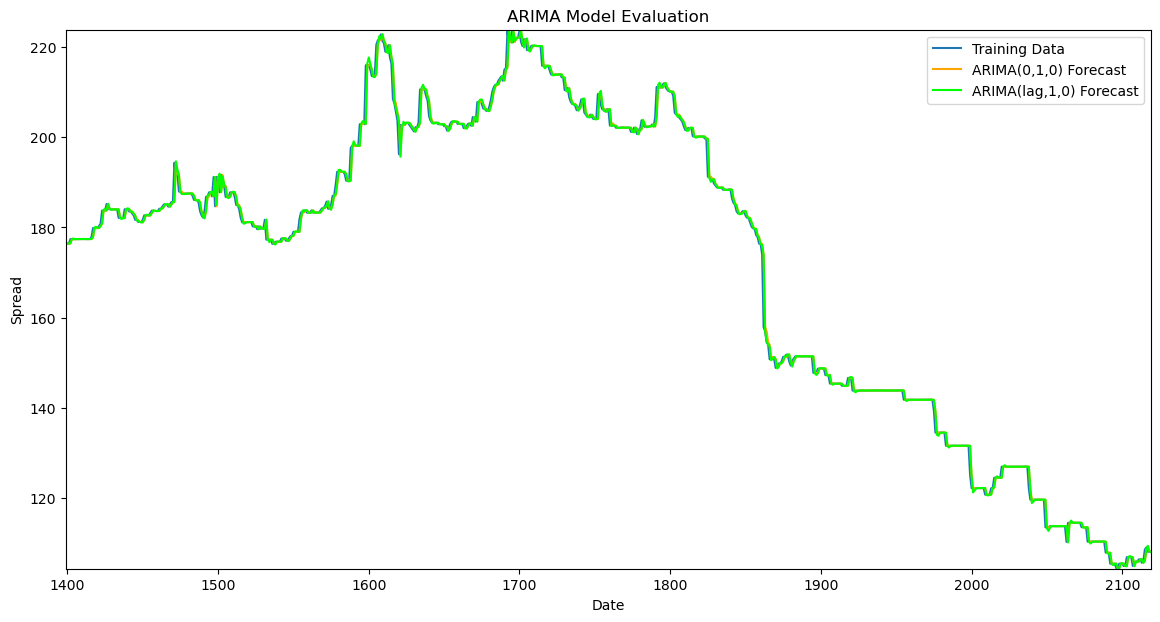


Evaluating column: India_8
Time interval:  2018-02-16 - 2020-03-17
India_8_2018-02-16 - 2020-03-17 ARIMA(0,1,0) Metrics:
RMSE: 3.0395, MAE: 1.3278, MAPE: 1.2917
India_8_2018-02-16 - 2020-03-17 ARIMA(3,1,0) Metrics:
RMSE: 2.5858, MAE: 1.1768, MAPE: 1.1508
Better model for India_8_2018-02-16 - 2020-03-17: ARIMA(3,1,0)


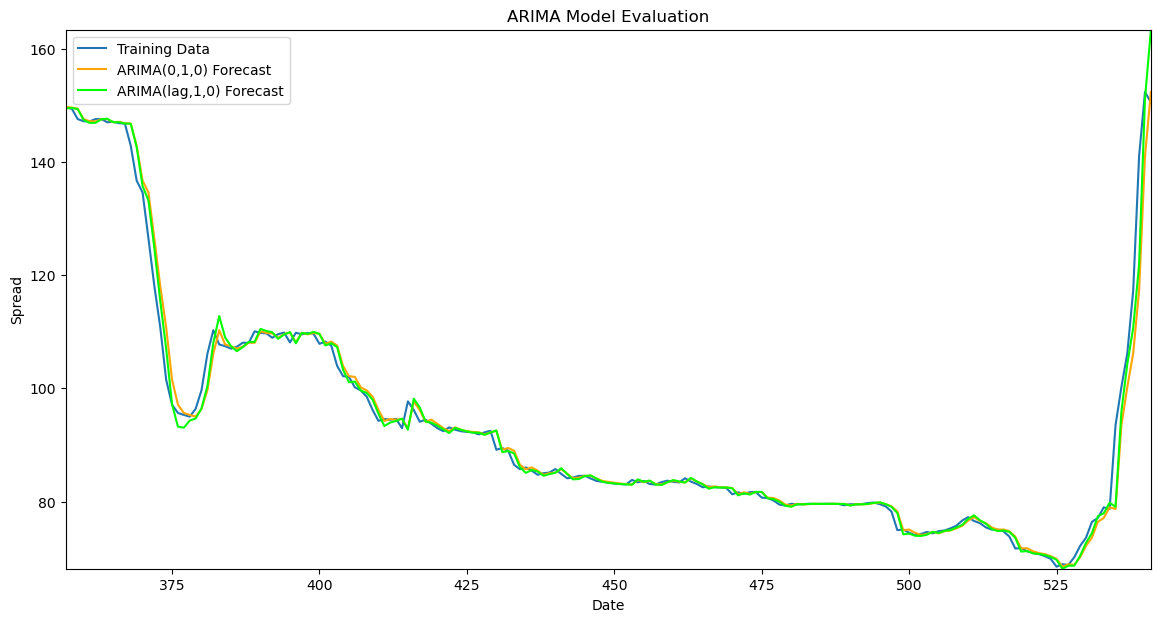


Evaluating column: India_8
Time interval:  2020-03-17 - 2023-11-02
India_8_2020-03-17 - 2023-11-02 ARIMA(0,1,0) Metrics:
RMSE: 2.9550, MAE: 0.3951, MAPE: 0.3492
India_8_2020-03-17 - 2023-11-02 ARIMA(3,1,0) Metrics:
RMSE: 3.2131, MAE: 0.6322, MAPE: 0.5563
Better model for India_8_2020-03-17 - 2023-11-02: ARIMA(0,1,0)


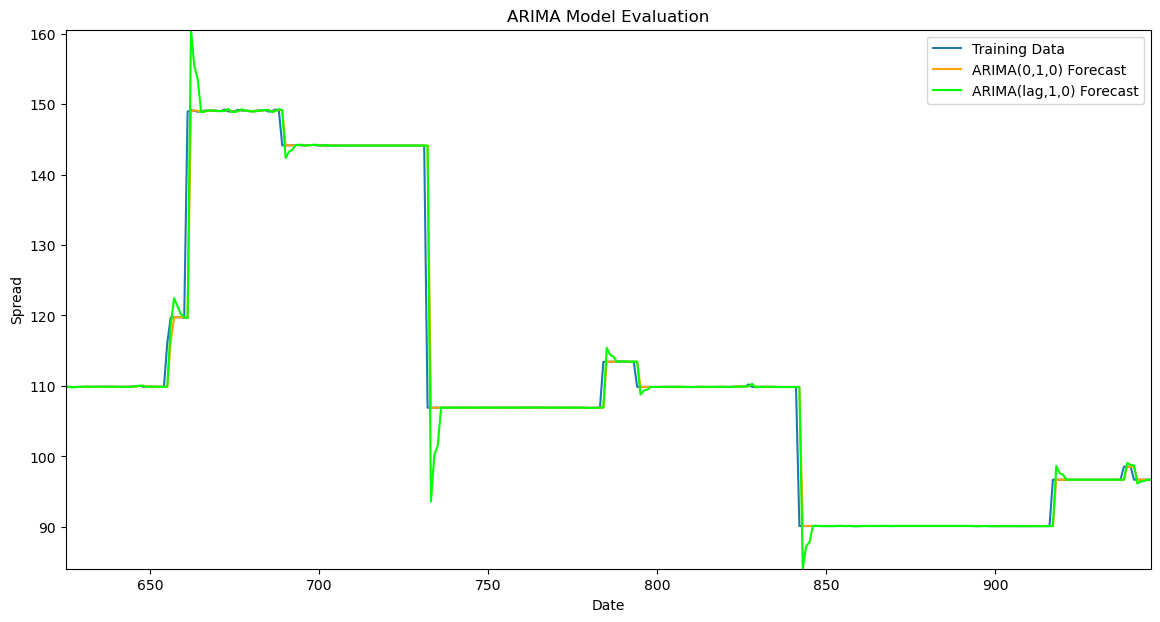

India_36

Evaluating column: India_36
Time interval:  2010-01-01 - 2012-05-31
India_36_2010-01-01 - 2012-05-31 ARIMA(0,1,0) Metrics:
RMSE: 16.6023, MAE: 8.3061, MAPE: 2.7423
India_36_2010-01-01 - 2012-05-31 ARIMA(3,1,0) Metrics:
RMSE: 16.6140, MAE: 8.4068, MAPE: 2.7895
Better model for India_36_2010-01-01 - 2012-05-31: ARIMA(0,1,0)


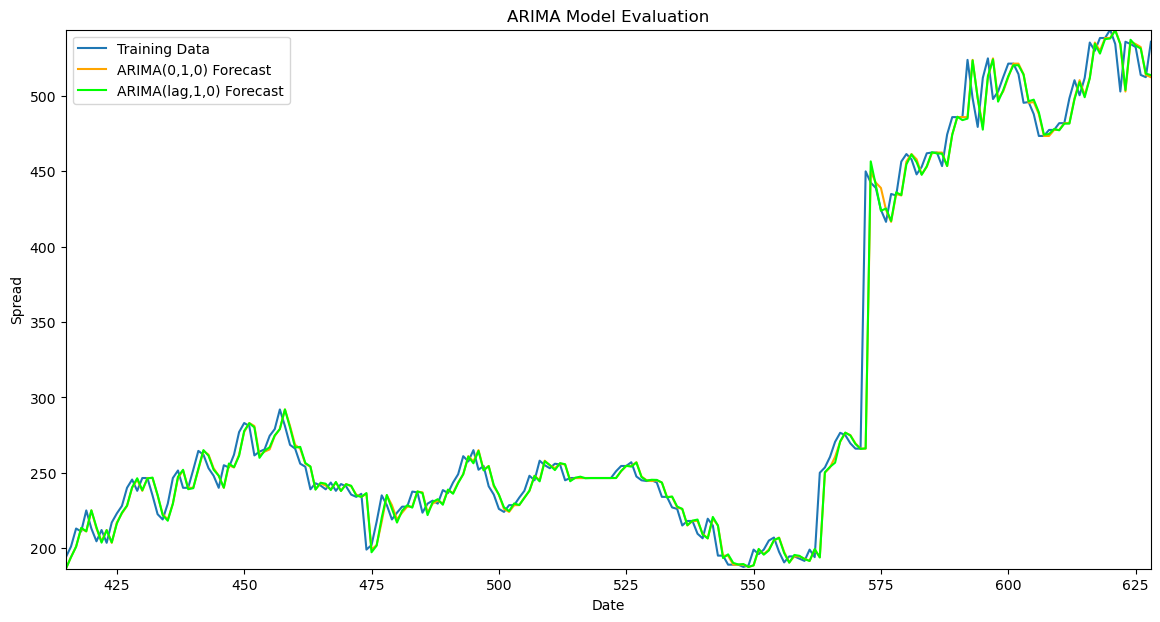


Evaluating column: India_36
Time interval:  2012-05-31 - 2014-09-23
India_36_2012-05-31 - 2014-09-23 ARIMA(0,1,0) Metrics:
RMSE: 2.6004, MAE: 1.6553, MAPE: 0.7550
India_36_2012-05-31 - 2014-09-23 ARIMA(3,1,0) Metrics:
RMSE: 2.6126, MAE: 1.6954, MAPE: 0.7733
Better model for India_36_2012-05-31 - 2014-09-23: ARIMA(0,1,0)


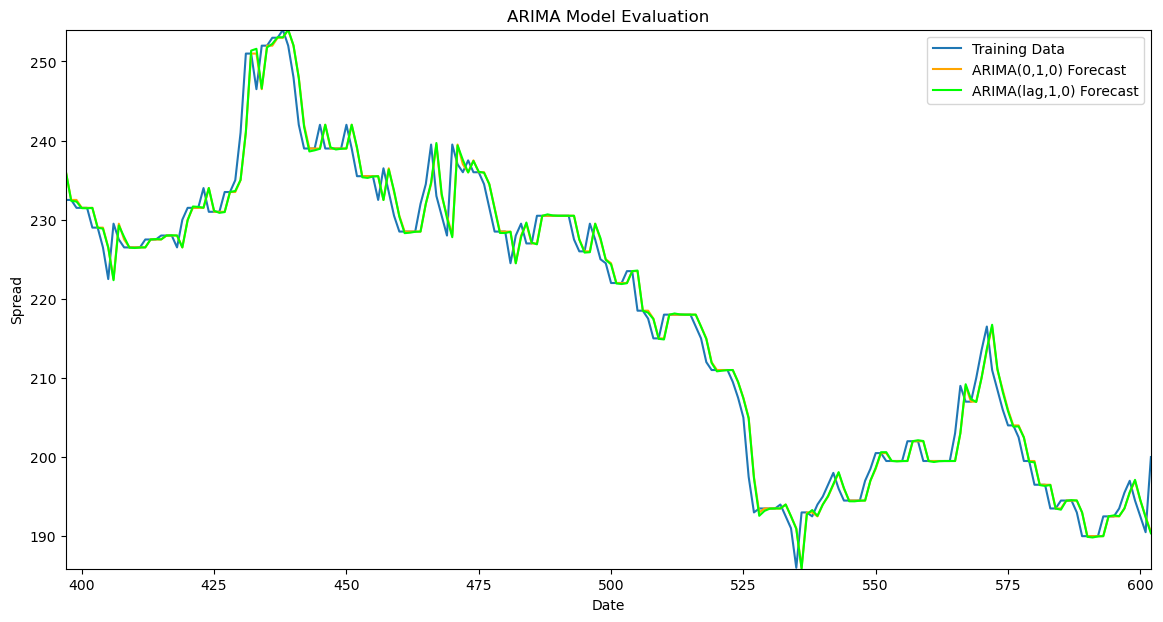


Evaluating column: India_36
Time interval:  2014-09-23 - 2023-06-07
India_36_2014-09-23 - 2023-06-07 ARIMA(0,1,0) Metrics:
RMSE: 3.1842, MAE: 1.6999, MAPE: 0.8355
India_36_2014-09-23 - 2023-06-07 ARIMA(3,1,0) Metrics:
RMSE: 3.0937, MAE: 1.8059, MAPE: 0.8914
Better model for India_36_2014-09-23 - 2023-06-07: ARIMA(0,1,0)


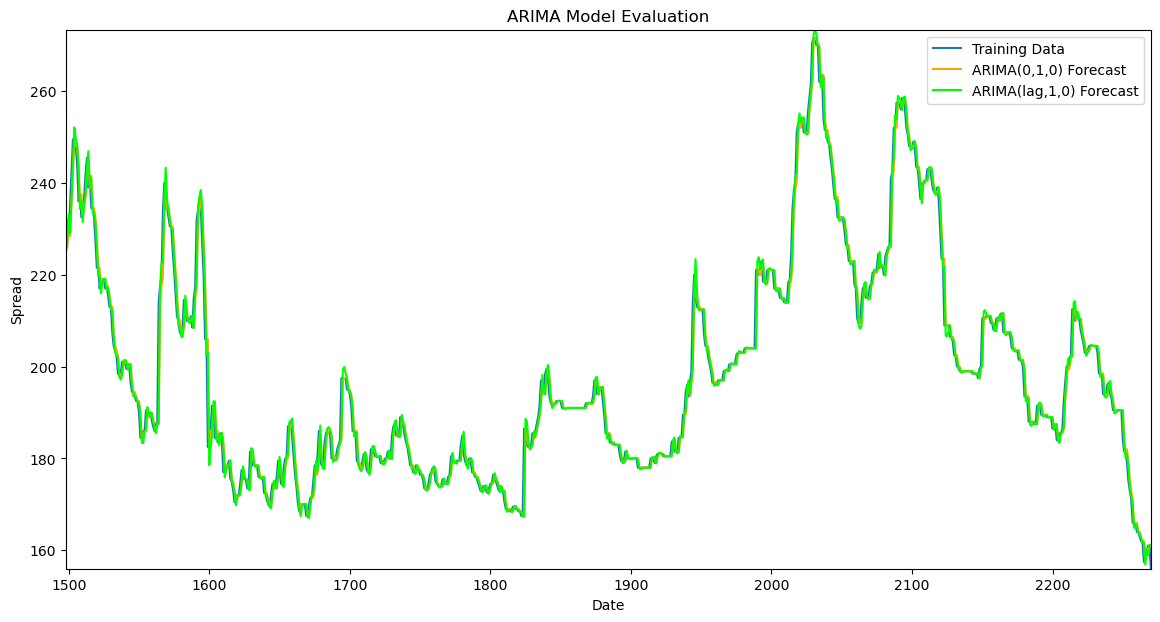

India_40

Evaluating column: India_40
Time interval:  2010-01-01 - 2013-01-04
India_40_2010-01-01 - 2013-01-04 ARIMA(0,1,0) Metrics:
RMSE: 6.4565, MAE: 2.2027, MAPE: 0.7116
India_40_2010-01-01 - 2013-01-04 ARIMA(5,1,0) Metrics:
RMSE: 6.5554, MAE: 2.5845, MAPE: 0.8346
Better model for India_40_2010-01-01 - 2013-01-04: ARIMA(0,1,0)



Evaluating column: India_40
Time interval:  2013-01-04 - 2021-04-15
India_40_2013-01-04 - 2021-04-15 ARIMA(0,1,0) Metrics:
RMSE: 3.4203, MAE: 1.1498, MAPE: 1.0149
India_40_2013-01-04 - 2021-04-15 ARIMA(5,1,0) Metrics:
RMSE: 3.1804, MAE: 1.1426, MAPE: 1.0068
Better model for India_40_2013-01-04 - 2021-04-15: ARIMA(5,1,0)


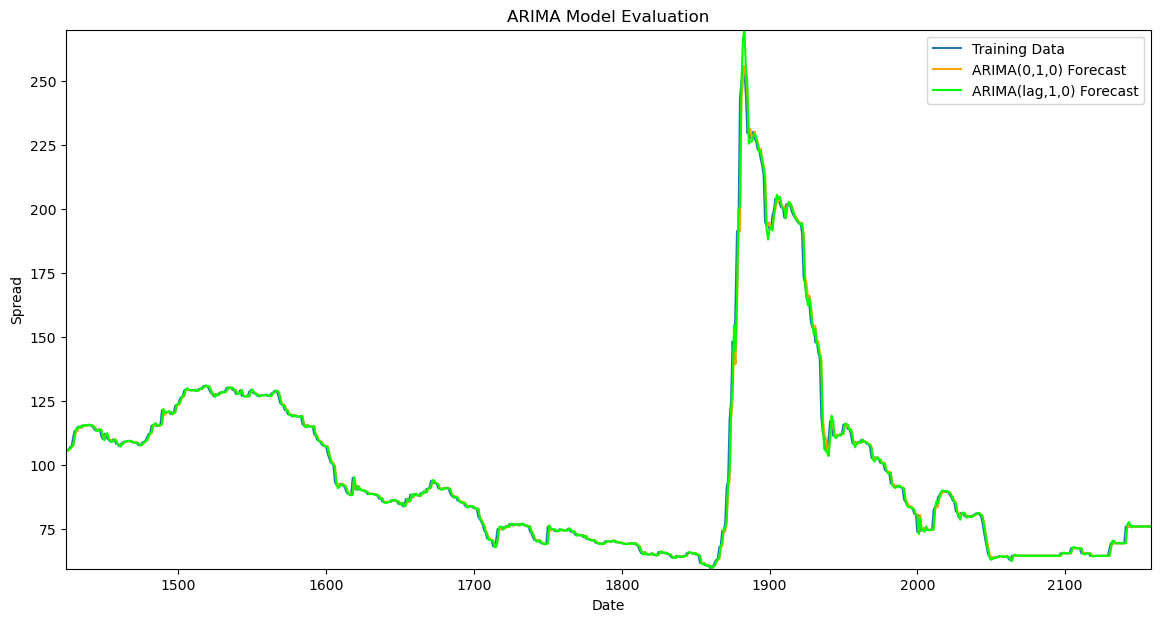


Evaluating column: India_40
Time interval:  2021-04-15 - 2024-01-18
India_40_2021-04-15 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 1.6440, MAE: 0.5922, MAPE: 0.8648
India_40_2021-04-15 - 2024-01-18 ARIMA(5,1,0) Metrics:
RMSE: 1.7057, MAE: 0.6966, MAPE: 1.0169
Better model for India_40_2021-04-15 - 2024-01-18: ARIMA(0,1,0)


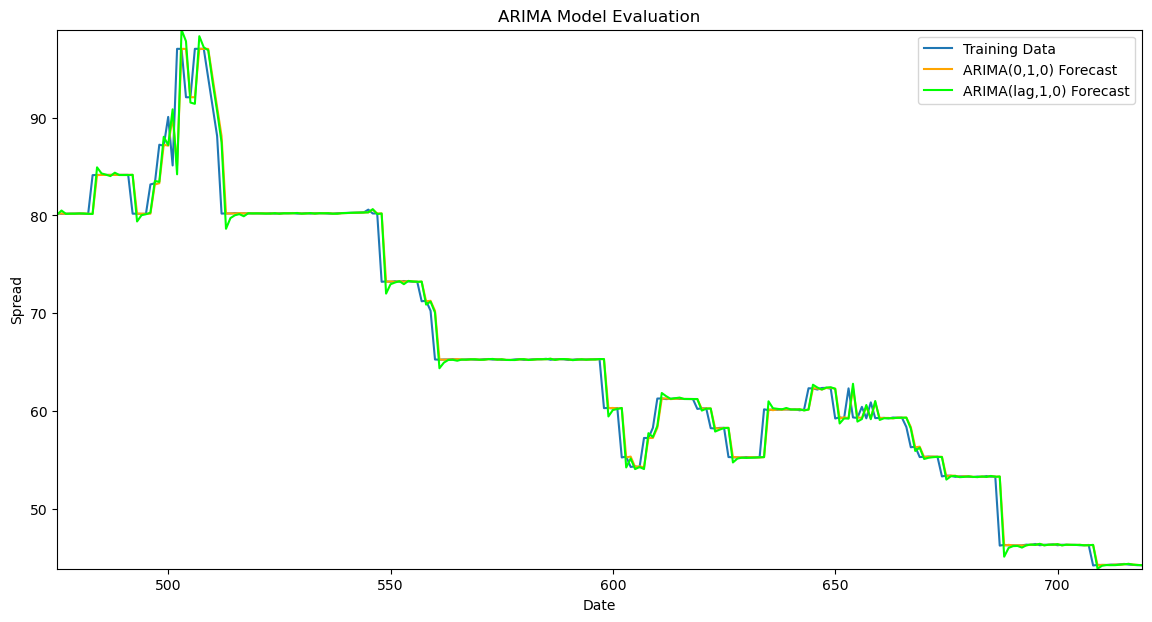

India_67

Evaluating column: India_67
Time interval:  2010-01-01 - 2012-05-30
India_67_2010-01-01 - 2012-05-30 ARIMA(0,1,0) Metrics:
RMSE: 7.8568, MAE: 5.2868, MAPE: 1.3648
India_67_2010-01-01 - 2012-05-30 ARIMA(4,1,0) Metrics:
RMSE: 7.6357, MAE: 5.3071, MAPE: 1.3744
Better model for India_67_2010-01-01 - 2012-05-30: ARIMA(0,1,0)


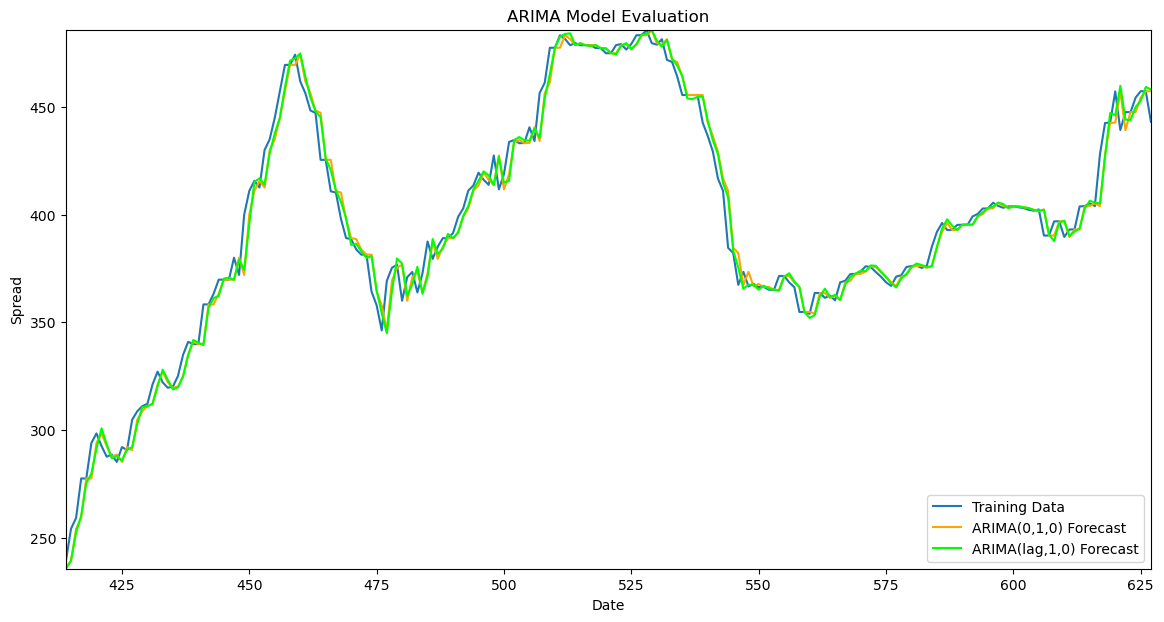


Evaluating column: India_67
Time interval:  2012-05-30 - 2020-03-10
India_67_2012-05-30 - 2020-03-10 ARIMA(0,1,0) Metrics:
RMSE: 1.4986, MAE: 0.8026, MAPE: 0.7363
India_67_2012-05-30 - 2020-03-10 ARIMA(4,1,0) Metrics:
RMSE: 1.4660, MAE: 0.8408, MAPE: 0.7674
Better model for India_67_2012-05-30 - 2020-03-10: ARIMA(0,1,0)



Evaluating column: India_67
Time interval:  2020-03-10 - 2024-01-18
India_67_2020-03-10 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.8427, MAE: 0.5937, MAPE: 0.6499
India_67_2020-03-10 - 2024-01-18 ARIMA(4,1,0) Metrics:
RMSE: 2.9075, MAE: 0.8115, MAPE: 0.8868
Better model for India_67_2020-03-10 - 2024-01-18: ARIMA(0,1,0)


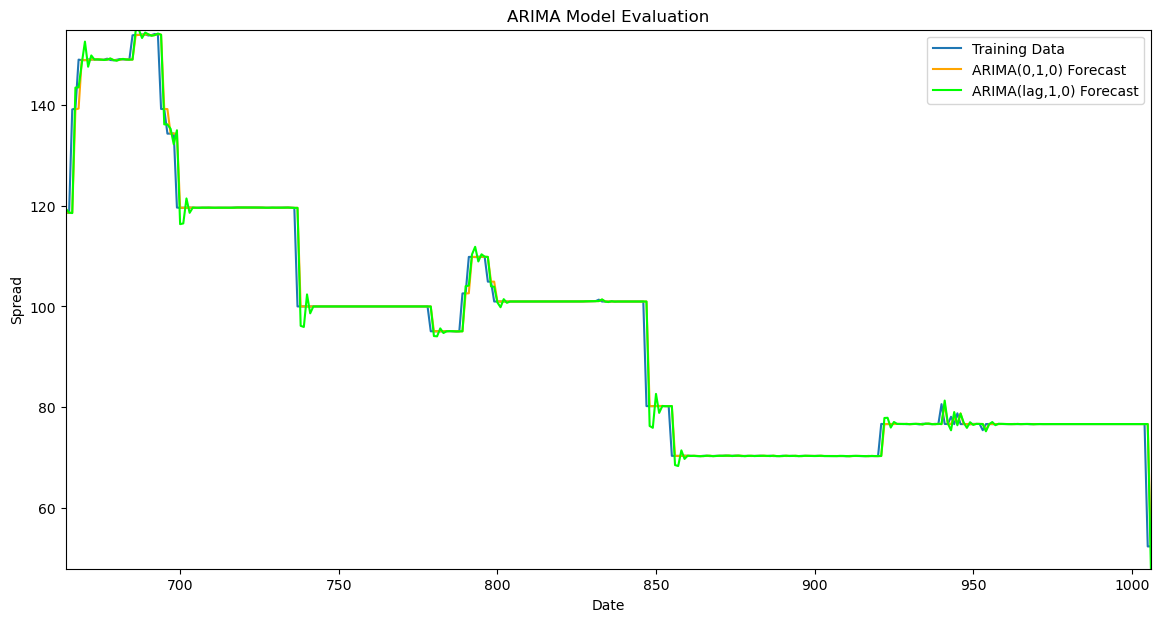

India_69

Evaluating column: India_69
Time interval:  2010-01-01 - 2012-01-23
India_69_2010-01-01 - 2012-01-23 ARIMA(0,1,0) Metrics:
RMSE: 7.1914, MAE: 4.7815, MAPE: 1.3596
India_69_2010-01-01 - 2012-01-23 ARIMA(4,1,0) Metrics:
RMSE: 7.0550, MAE: 4.8296, MAPE: 1.3852
Better model for India_69_2010-01-01 - 2012-01-23: ARIMA(0,1,0)



Evaluating column: India_69
Time interval:  2012-01-23 - 2020-03-10
India_69_2012-01-23 - 2020-03-10 ARIMA(0,1,0) Metrics:
RMSE: 1.5670, MAE: 0.7735, MAPE: 0.7251
India_69_2012-01-23 - 2020-03-10 ARIMA(4,1,0) Metrics:
RMSE: 1.5247, MAE: 0.8086, MAPE: 0.7537
Better model for India_69_2012-01-23 - 2020-03-10: ARIMA(0,1,0)



Evaluating column: India_69
Time interval:  2020-03-10 - 2023-10-10
India_69_2020-03-10 - 2023-10-10 ARIMA(0,1,0) Metrics:
RMSE: 4.0864, MAE: 2.0154, MAPE: 2.0293
India_69_2020-03-10 - 2023-10-10 ARIMA(4,1,0) Metrics:
RMSE: 4.4822, MAE: 2.3854, MAPE: 2.4292
Better model for India_69_2020-03-10 - 2023-10-10: ARIMA(0,1,0)


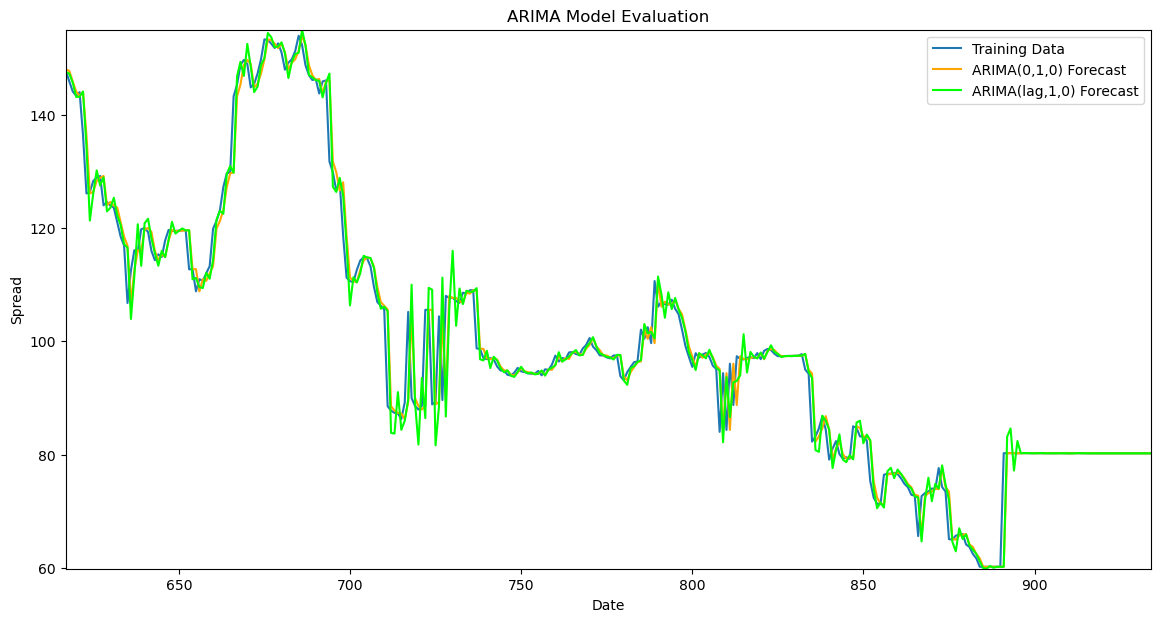

India_124

Evaluating column: India_124
Time interval:  2010-01-01 - 2018-02-20
India_124_2010-01-01 - 2018-02-20 ARIMA(0,1,0) Metrics:
RMSE: 0.8554, MAE: 0.4688, MAPE: 0.9527
India_124_2010-01-01 - 2018-02-20 ARIMA(3,1,0) Metrics:
RMSE: 0.8533, MAE: 0.4850, MAPE: 0.9878
Better model for India_124_2010-01-01 - 2018-02-20: ARIMA(0,1,0)


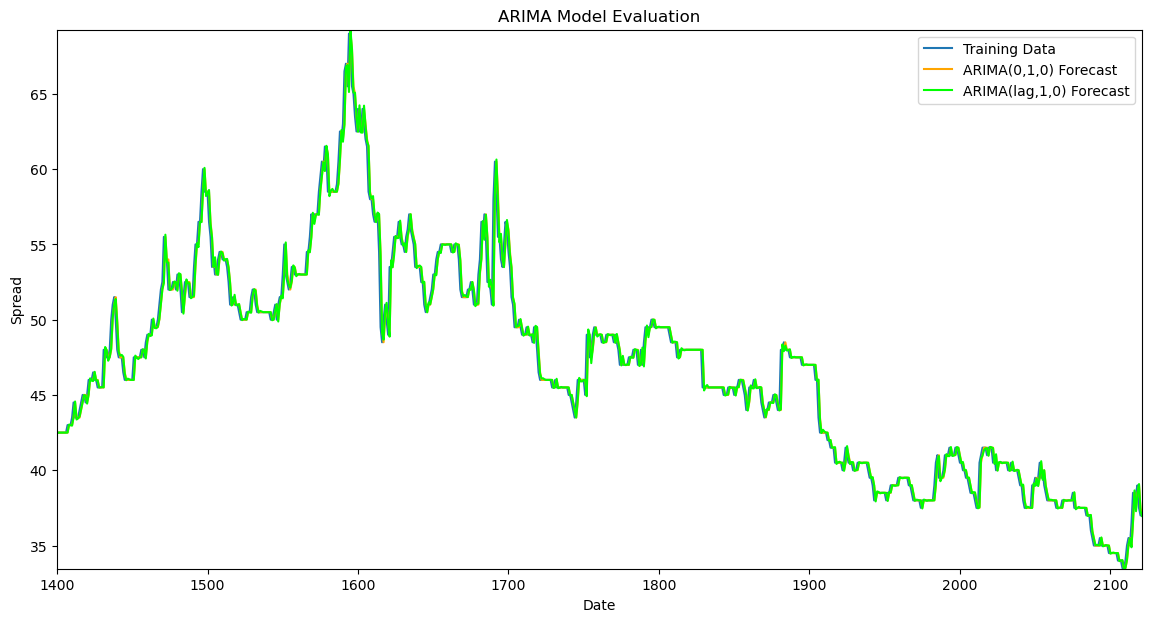


Evaluating column: India_124
Time interval:  2018-02-20 - 2020-03-05
India_124_2018-02-20 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 0.7168, MAE: 0.4033, MAPE: 1.2057
India_124_2018-02-20 - 2020-03-05 ARIMA(3,1,0) Metrics:
RMSE: 0.6970, MAE: 0.4123, MAPE: 1.2379
Better model for India_124_2018-02-20 - 2020-03-05: ARIMA(0,1,0)


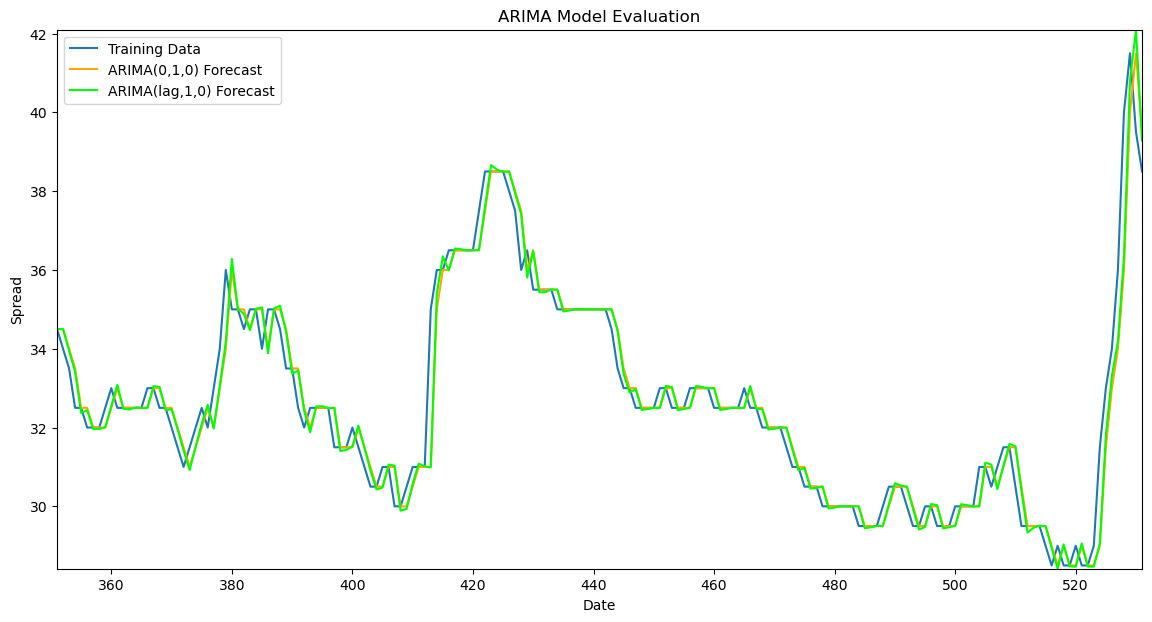


Evaluating column: India_124
Time interval:  2020-03-05 - 2023-06-05
India_124_2020-03-05 - 2023-06-05 ARIMA(0,1,0) Metrics:
RMSE: 0.9091, MAE: 0.4792, MAPE: 1.1129
India_124_2020-03-05 - 2023-06-05 ARIMA(3,1,0) Metrics:
RMSE: 0.8996, MAE: 0.5325, MAPE: 1.2321
Better model for India_124_2020-03-05 - 2023-06-05: ARIMA(0,1,0)


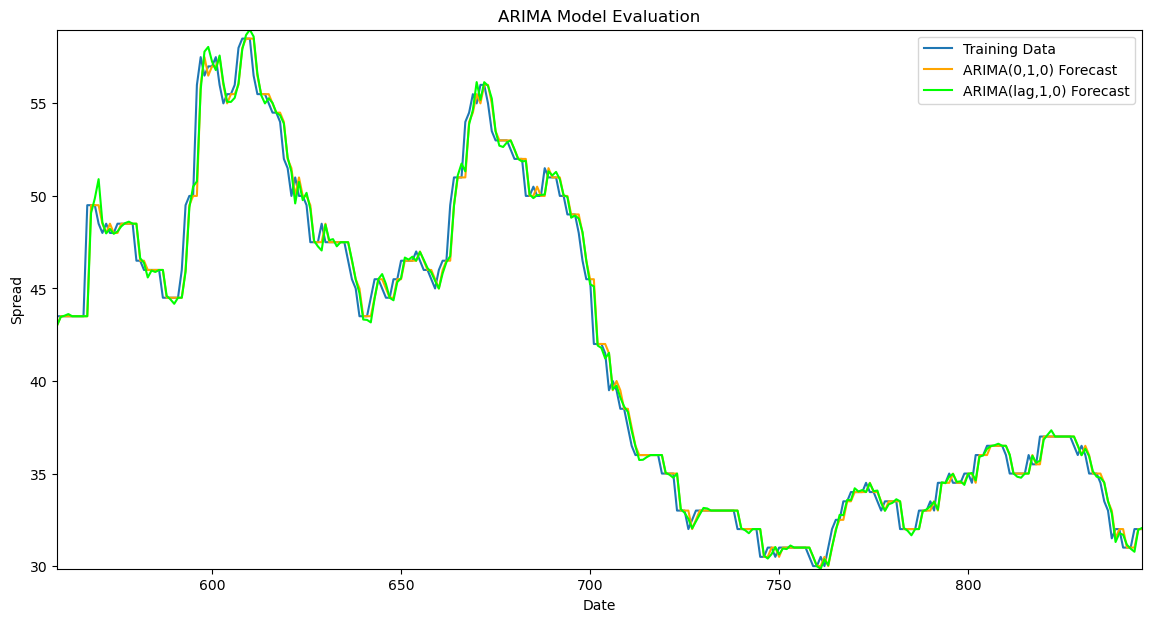

India_136

Evaluating column: India_136
Time interval:  2010-01-01 - 2013-11-14
India_136_2010-01-01 - 2013-11-14 ARIMA(0,1,0) Metrics:
RMSE: 4.1627, MAE: 2.9578, MAPE: 2.2459
India_136_2010-01-01 - 2013-11-14 ARIMA(3,1,0) Metrics:
RMSE: 4.1824, MAE: 2.9908, MAPE: 2.2712
Better model for India_136_2010-01-01 - 2013-11-14: ARIMA(0,1,0)


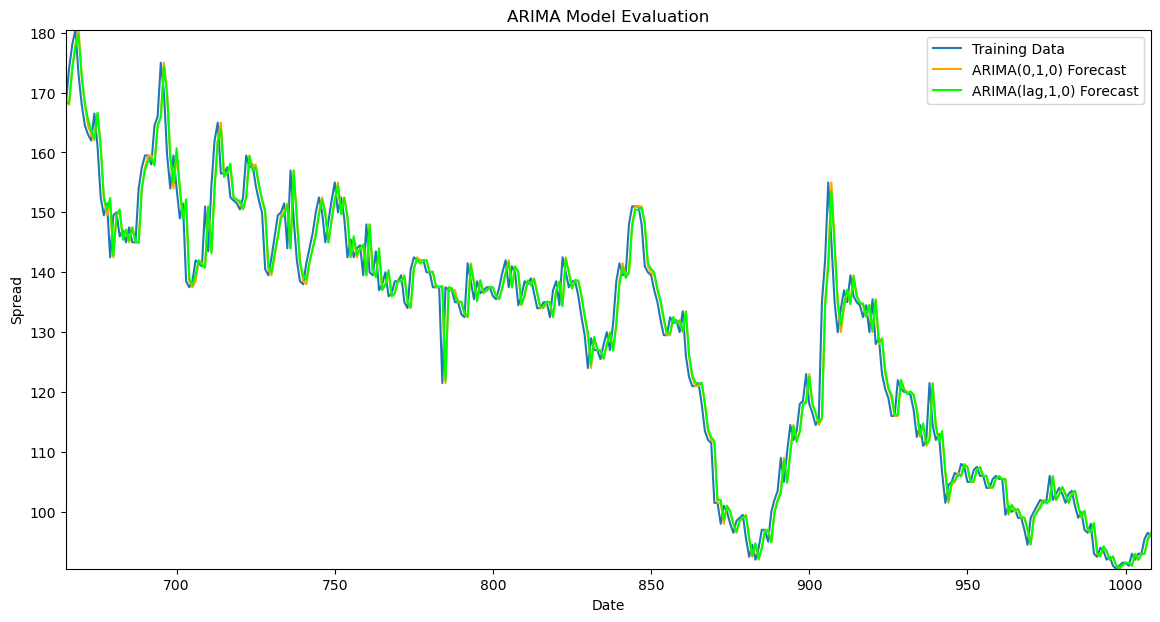


Evaluating column: India_136
Time interval:  2013-11-14 - 2016-01-01
India_136_2013-11-14 - 2016-01-01 ARIMA(0,1,0) Metrics:
RMSE: 1.7637, MAE: 1.2316, MAPE: 1.4255
India_136_2013-11-14 - 2016-01-01 ARIMA(3,1,0) Metrics:
RMSE: 2.0117, MAE: 1.4555, MAPE: 1.6744
Better model for India_136_2013-11-14 - 2016-01-01: ARIMA(0,1,0)


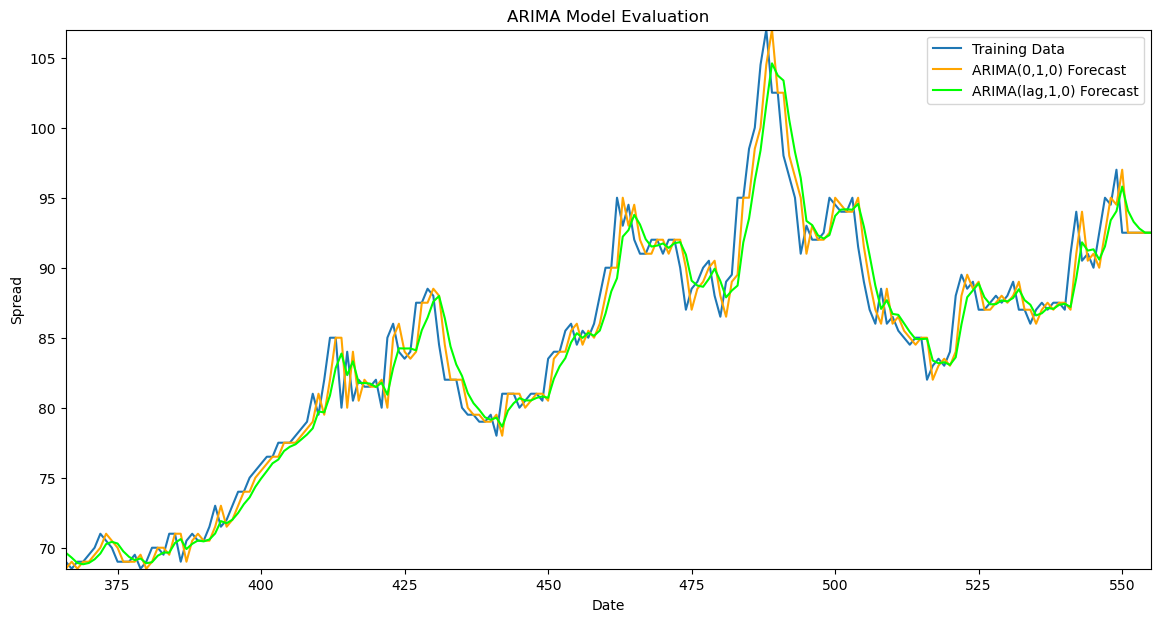


Evaluating column: India_136
Time interval:  2016-01-01 - 2024-01-18
India_136_2016-01-01 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 1.4428, MAE: 0.6394, MAPE: 1.7286
India_136_2016-01-01 - 2024-01-18 ARIMA(3,1,0) Metrics:
RMSE: 1.5004, MAE: 0.7085, MAPE: 1.9297
Better model for India_136_2016-01-01 - 2024-01-18: ARIMA(0,1,0)


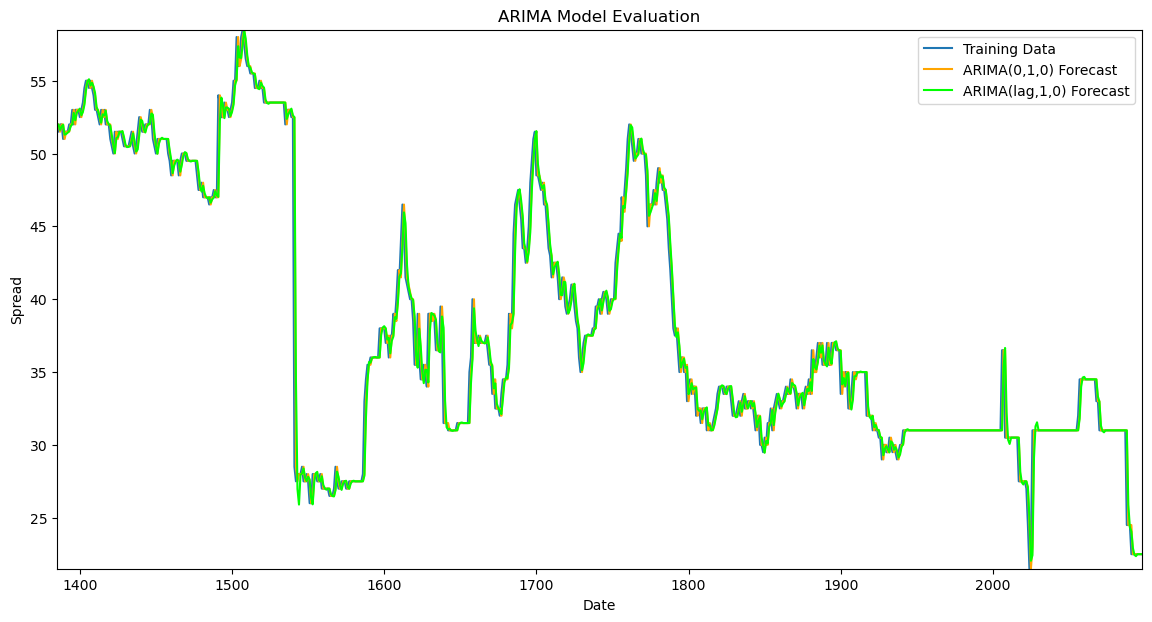

India_153

Evaluating column: India_153
Time interval:  2010-01-01 - 2013-11-18
India_153_2010-01-01 - 2013-11-18 ARIMA(0,1,0) Metrics:
RMSE: 4.1131, MAE: 2.0096, MAPE: 0.8784
India_153_2010-01-01 - 2013-11-18 ARIMA(6,1,0) Metrics:
RMSE: 3.9574, MAE: 2.1271, MAPE: 0.9325
Better model for India_153_2010-01-01 - 2013-11-18: ARIMA(0,1,0)


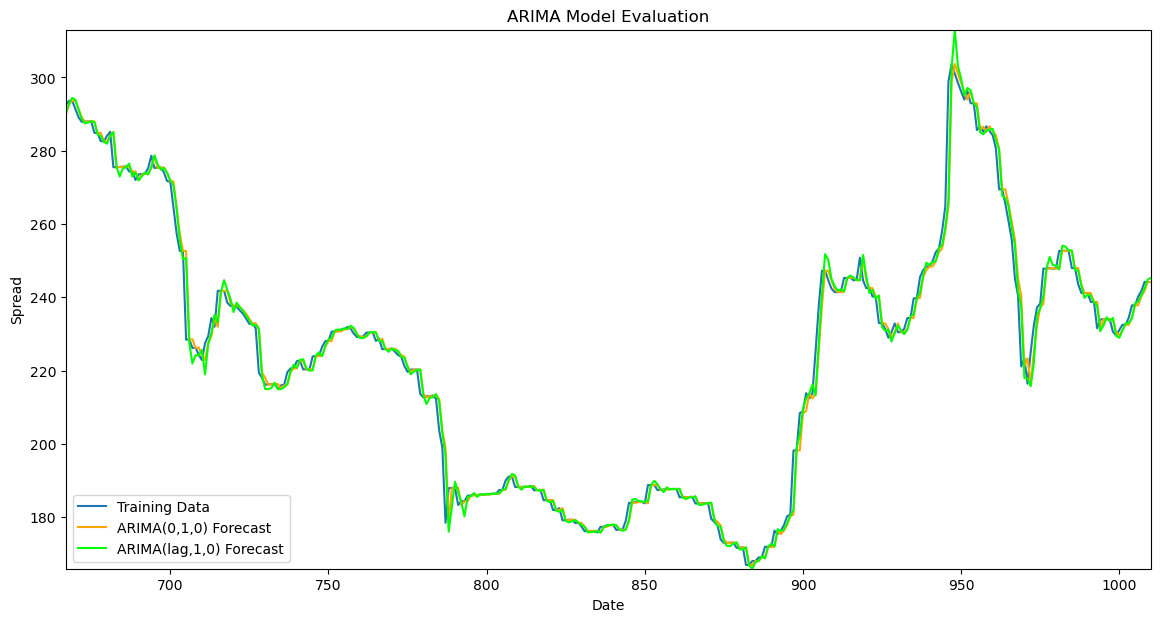


Evaluating column: India_153
Time interval:  2013-11-18 - 2015-12-28
India_153_2013-11-18 - 2015-12-28 ARIMA(0,1,0) Metrics:
RMSE: 1.7474, MAE: 0.7791, MAPE: 0.4371
India_153_2013-11-18 - 2015-12-28 ARIMA(6,1,0) Metrics:
RMSE: 1.9428, MAE: 1.0624, MAPE: 0.6027
Better model for India_153_2013-11-18 - 2015-12-28: ARIMA(0,1,0)


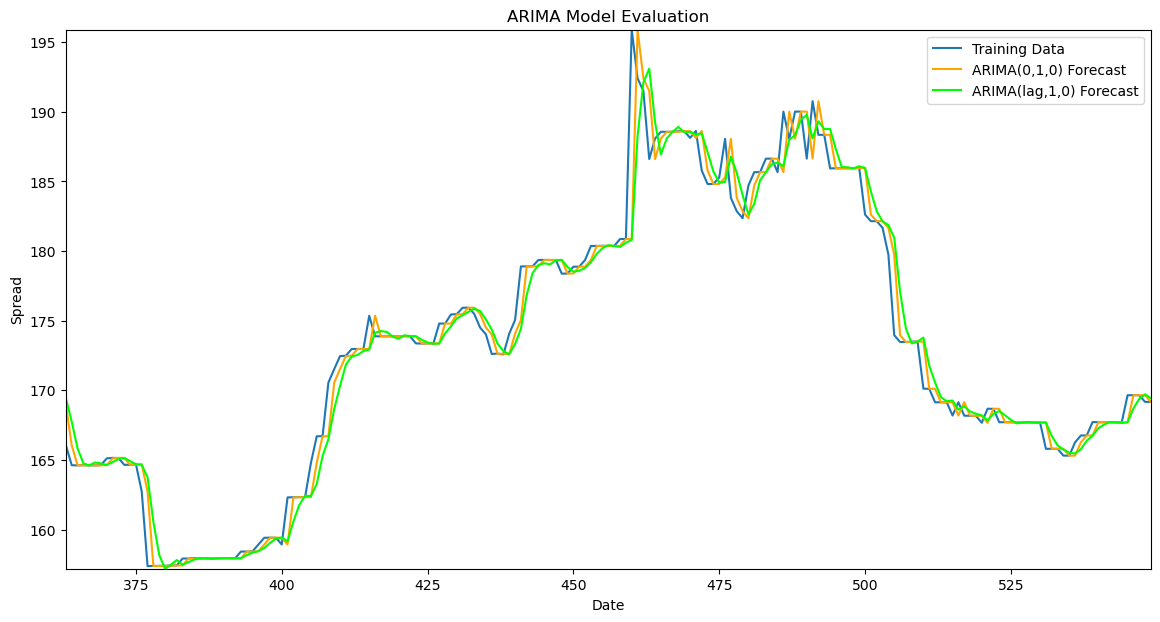


Evaluating column: India_153
Time interval:  2015-12-28 - 2018-02-06
India_153_2015-12-28 - 2018-02-06 ARIMA(0,1,0) Metrics:
RMSE: 1.1519, MAE: 0.3152, MAPE: 0.3065
India_153_2015-12-28 - 2018-02-06 ARIMA(6,1,0) Metrics:
RMSE: 1.1539, MAE: 0.3807, MAPE: 0.3691
Better model for India_153_2015-12-28 - 2018-02-06: ARIMA(0,1,0)


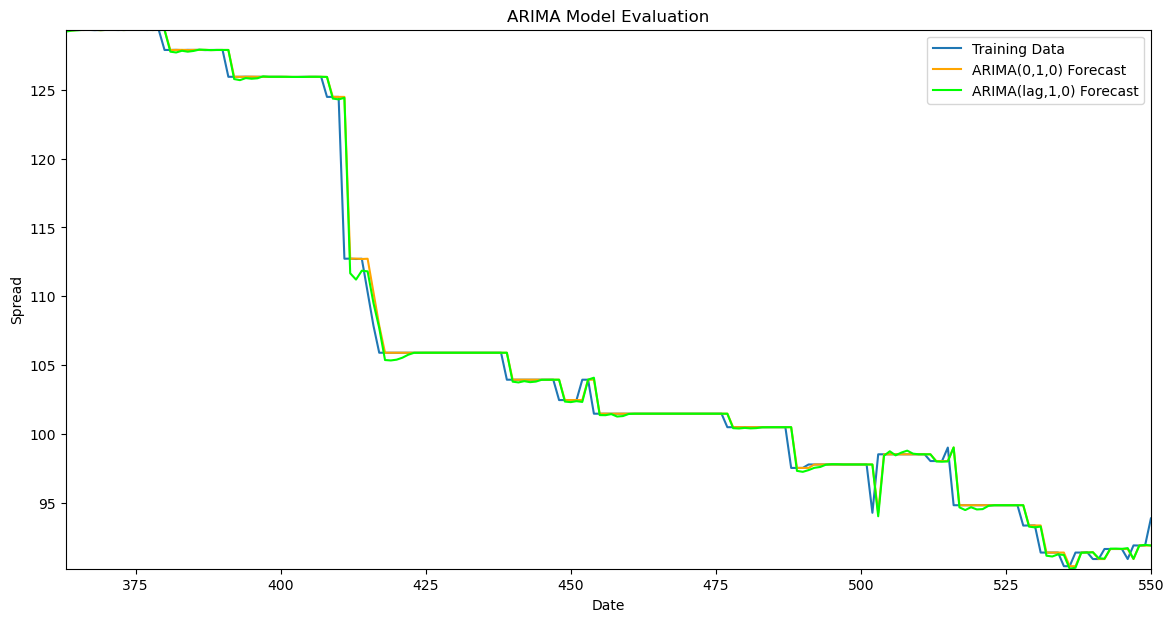


Evaluating column: India_153
Time interval:  2018-02-06 - 2020-03-17
India_153_2018-02-06 - 2020-03-17 ARIMA(0,1,0) Metrics:
RMSE: 3.0456, MAE: 1.1067, MAPE: 1.1159
India_153_2018-02-06 - 2020-03-17 ARIMA(6,1,0) Metrics:
RMSE: 2.4827, MAE: 0.9808, MAPE: 1.0293
Better model for India_153_2018-02-06 - 2020-03-17: ARIMA(6,1,0)


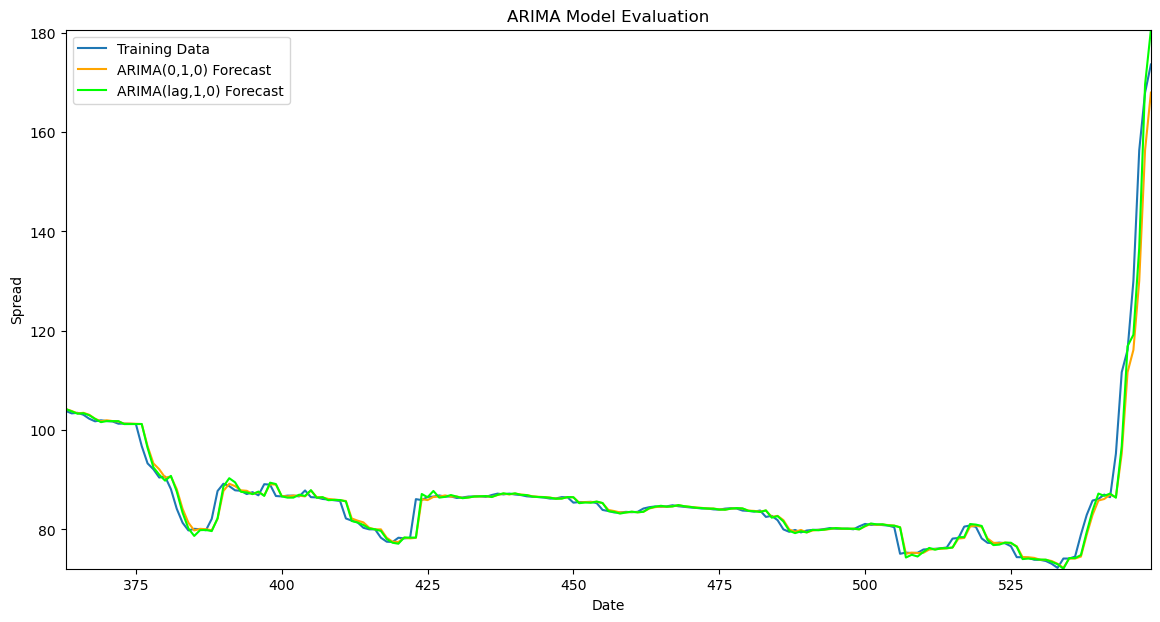


Evaluating column: India_153
Time interval:  2020-03-17 - 2024-01-18
India_153_2020-03-17 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.2567, MAE: 0.8689, MAPE: 0.9350
India_153_2020-03-17 - 2024-01-18 ARIMA(6,1,0) Metrics:
RMSE: 2.2980, MAE: 1.1003, MAPE: 1.2110
Better model for India_153_2020-03-17 - 2024-01-18: ARIMA(0,1,0)


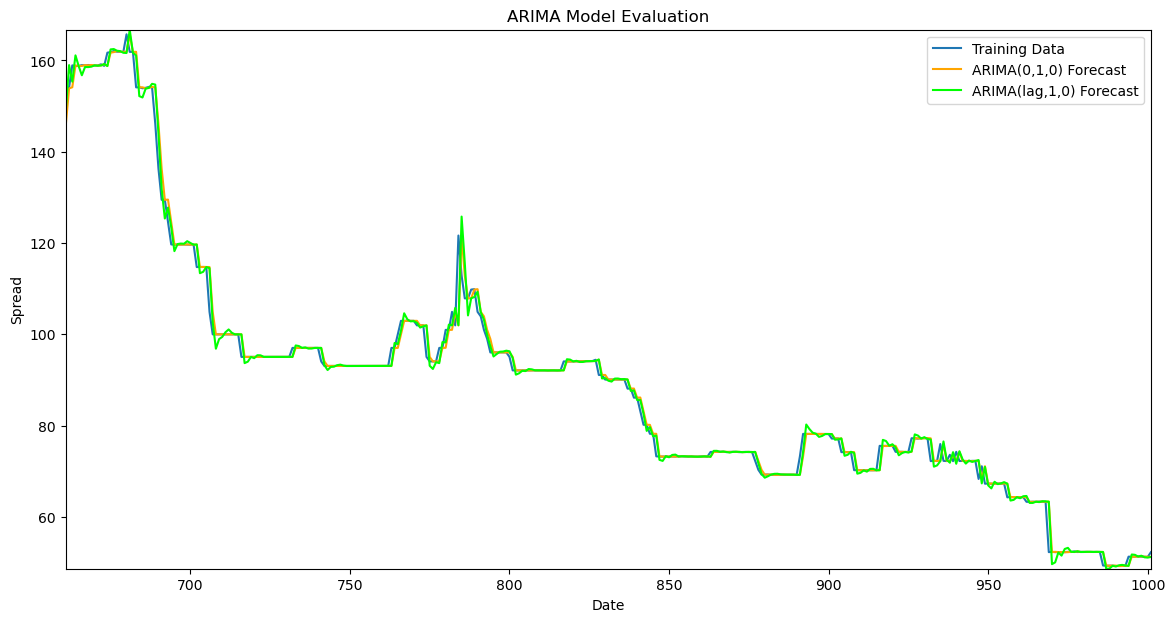

India_160

Evaluating column: India_160
Time interval:  2010-01-01 - 2015-04-16
India_160_2010-01-01 - 2015-04-16 ARIMA(0,1,0) Metrics:
RMSE: 2.9047, MAE: 1.5650, MAPE: 0.9502
India_160_2010-01-01 - 2015-04-16 ARIMA(3,1,0) Metrics:
RMSE: 2.9599, MAE: 1.6623, MAPE: 1.0073
Better model for India_160_2010-01-01 - 2015-04-16: ARIMA(0,1,0)


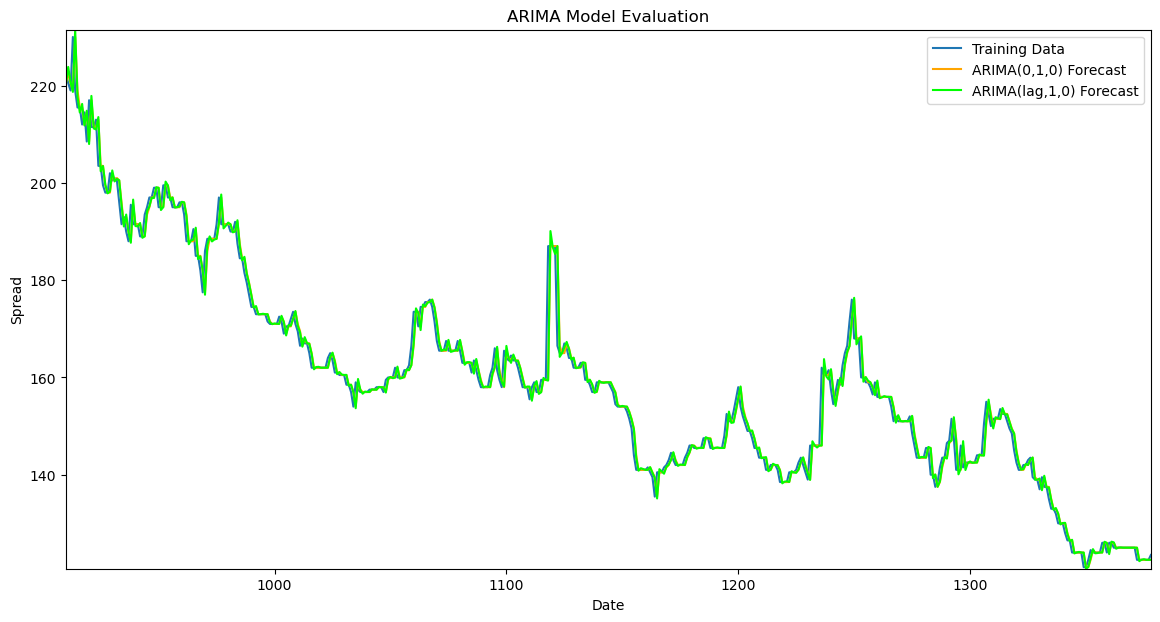


Evaluating column: India_160
Time interval:  2015-04-16 - 2020-03-05
India_160_2015-04-16 - 2020-03-05 ARIMA(0,1,0) Metrics:
RMSE: 3.1498, MAE: 1.7200, MAPE: 1.4869
India_160_2015-04-16 - 2020-03-05 ARIMA(3,1,0) Metrics:
RMSE: 3.1621, MAE: 1.7789, MAPE: 1.5310
Better model for India_160_2015-04-16 - 2020-03-05: ARIMA(0,1,0)


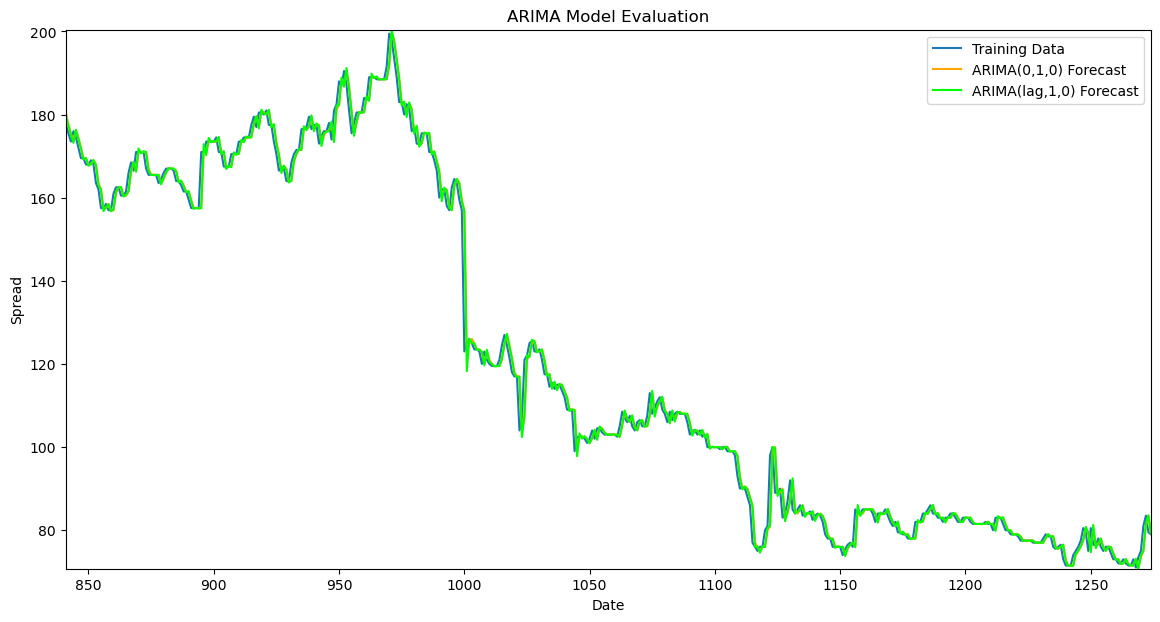


Evaluating column: India_160
Time interval:  2020-03-05 - 2023-06-05
India_160_2020-03-05 - 2023-06-05 ARIMA(0,1,0) Metrics:
RMSE: 3.0957, MAE: 1.6667, MAPE: 1.5785
India_160_2020-03-05 - 2023-06-05 ARIMA(3,1,0) Metrics:
RMSE: 3.0994, MAE: 1.7393, MAPE: 1.6476
Better model for India_160_2020-03-05 - 2023-06-05: ARIMA(0,1,0)


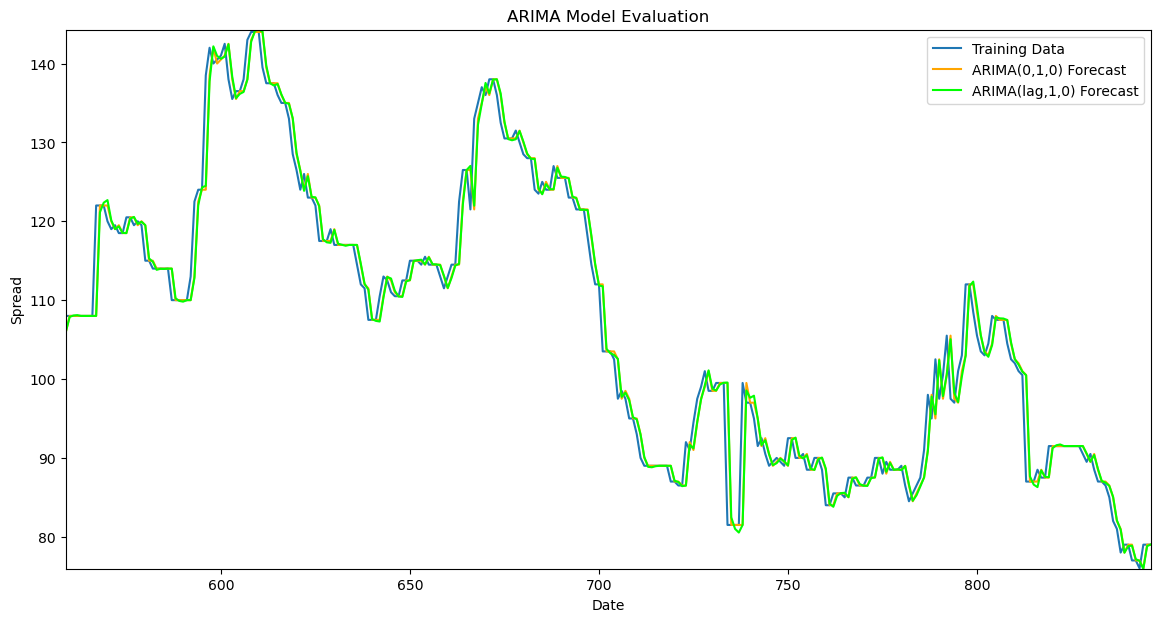

India_172

Evaluating column: India_172
Time interval:  2011-03-18 - 2018-02-28
India_172_2011-03-18 - 2018-02-28 ARIMA(0,1,0) Metrics:
RMSE: 1.1977, MAE: 0.5184, MAPE: 0.3747
India_172_2011-03-18 - 2018-02-28 ARIMA(4,1,0) Metrics:
RMSE: 1.1794, MAE: 0.5693, MAPE: 0.4147
Better model for India_172_2011-03-18 - 2018-02-28: ARIMA(0,1,0)



Evaluating column: India_172
Time interval:  2018-02-28 - 2020-02-03
India_172_2018-02-28 - 2020-02-03 ARIMA(0,1,0) Metrics:
RMSE: 1.2751, MAE: 0.6124, MAPE: 0.7186
India_172_2018-02-28 - 2020-02-03 ARIMA(4,1,0) Metrics:
RMSE: 1.2826, MAE: 0.6410, MAPE: 0.7520
Better model for India_172_2018-02-28 - 2020-02-03: ARIMA(0,1,0)


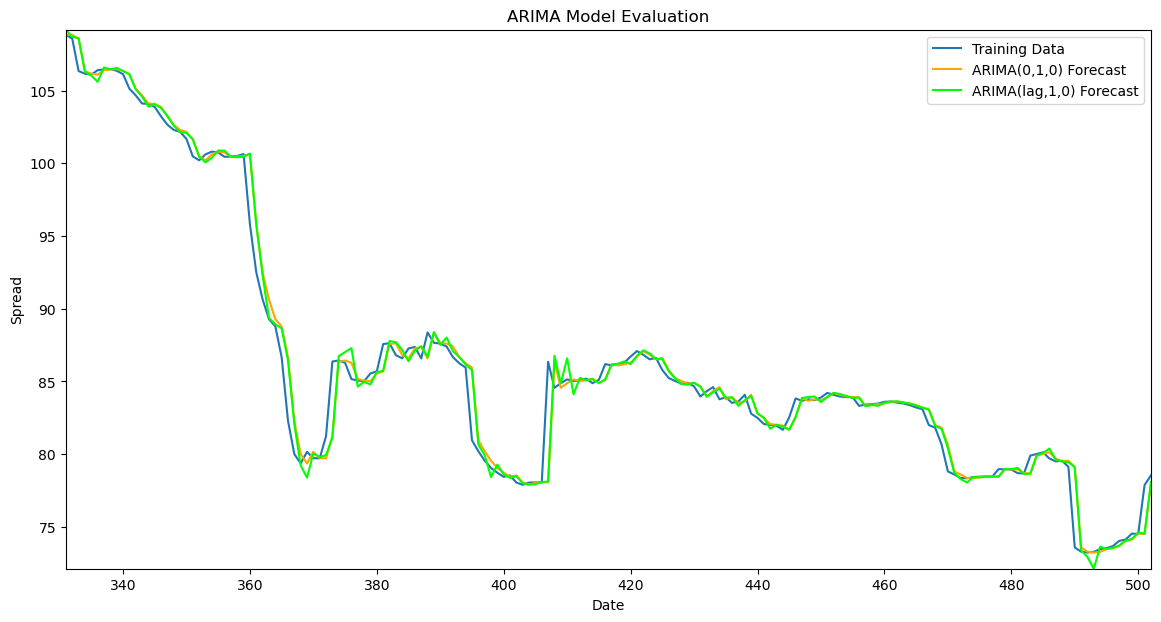


Evaluating column: India_172
Time interval:  2020-02-03 - 2024-01-18
India_172_2020-02-03 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 2.6115, MAE: 1.0671, MAPE: 1.1197
India_172_2020-02-03 - 2024-01-18 ARIMA(4,1,0) Metrics:
RMSE: 2.7020, MAE: 1.2460, MAPE: 1.3333
Better model for India_172_2020-02-03 - 2024-01-18: ARIMA(0,1,0)


India_199

Evaluating column: India_199
Time interval:  2014-10-07 - 2015-06-25
India_199_2014-10-07 - 2015-06-25 ARIMA(0,1,0) Metrics:
RMSE: 2.9014, MAE: 2.1172, MAPE: 1.2413
India_199_2014-10-07 - 2015-06-25 ARIMA(6,1,0) Metrics:
RMSE: 2.8617, MAE: 2.0868, MAPE: 1.2253
Better model for India_199_2014-10-07 - 2015-06-25: ARIMA(6,1,0)



Evaluating column: India_199
Time interval:  2015-06-25 - 2024-01-18
India_199_2015-06-25 - 2024-01-18 ARIMA(0,1,0) Metrics:
RMSE: 7.9721, MAE: 2.1803, MAPE: 2.0596
India_199_2015-06-25 - 2024-01-18 ARIMA(6,1,0) Metrics:
RMSE: 8.0709, MAE: 2.4148, MAPE: 2.2827
Better model for India_199_2015-06-25 - 2024-01-18: ARIMA(0,1,0)


India_206

Evaluating column: India_206
Time interval:  2010-01-01 - 2011-10-07
India_206_2010-01-01 - 2011-10-07 ARIMA(0,1,0) Metrics:
RMSE: 23.1424, MAE: 15.9204, MAPE: 2.0174
India_206_2010-01-01 - 2011-10-07 ARIMA(3,1,0) Metrics:
RMSE: 22.7554, MAE: 15.9334, MAPE: 2.0336
Better model for India_206_2010-01-01 - 2011-10-07: ARIMA(0,1,0)



Evaluating column: India_206
Time interval:  2011-10-07 - 2014-11-06
India_206_2011-10-07 - 2014-11-06 ARIMA(0,1,0) Metrics:
RMSE: 7.8847, MAE: 4.9088, MAPE: 1.2498
India_206_2011-10-07 - 2014-11-06 ARIMA(3,1,0) Metrics:
RMSE: 7.8751, MAE: 4.9787, MAPE: 1.2679
Better model for India_206_2011-10-07 - 2014-11-06: ARIMA(0,1,0)



Evaluating column: India_206
Time interval:  2014-11-06 - 2021-10-14
India_206_2014-11-06 - 2021-10-14 ARIMA(0,1,0) Metrics:
RMSE: 12.0827, MAE: 4.9562, MAPE: 1.4026
India_206_2014-11-06 - 2021-10-14 ARIMA(3,1,0) Metrics:
RMSE: 12.1983, MAE: 5.2214, MAPE: 1.4717
Better model for India_206_2014-11-06 - 2021-10-14: ARIMA(0,1,0)


India_220

Evaluating column: India_220
Time interval:  2010-01-01 - 2012-05-31
India_220_2010-01-01 - 2012-05-31 ARIMA(0,1,0) Metrics:
RMSE: 12.0941, MAE: 8.9229, MAPE: 2.4630
India_220_2010-01-01 - 2012-05-31 ARIMA(3,1,0) Metrics:
RMSE: 12.1646, MAE: 9.0948, MAPE: 2.5138
Better model for India_220_2010-01-01 - 2012-05-31: ARIMA(0,1,0)



Evaluating column: India_220
Time interval:  2012-05-31 - 2014-11-06
India_220_2012-05-31 - 2014-11-06 ARIMA(0,1,0) Metrics:
RMSE: 3.3598, MAE: 2.0903, MAPE: 1.3701
India_220_2012-05-31 - 2014-11-06 ARIMA(3,1,0) Metrics:
RMSE: 3.3630, MAE: 2.1145, MAPE: 1.3864
Better model for India_220_2012-05-31 - 2014-11-06: ARIMA(0,1,0)


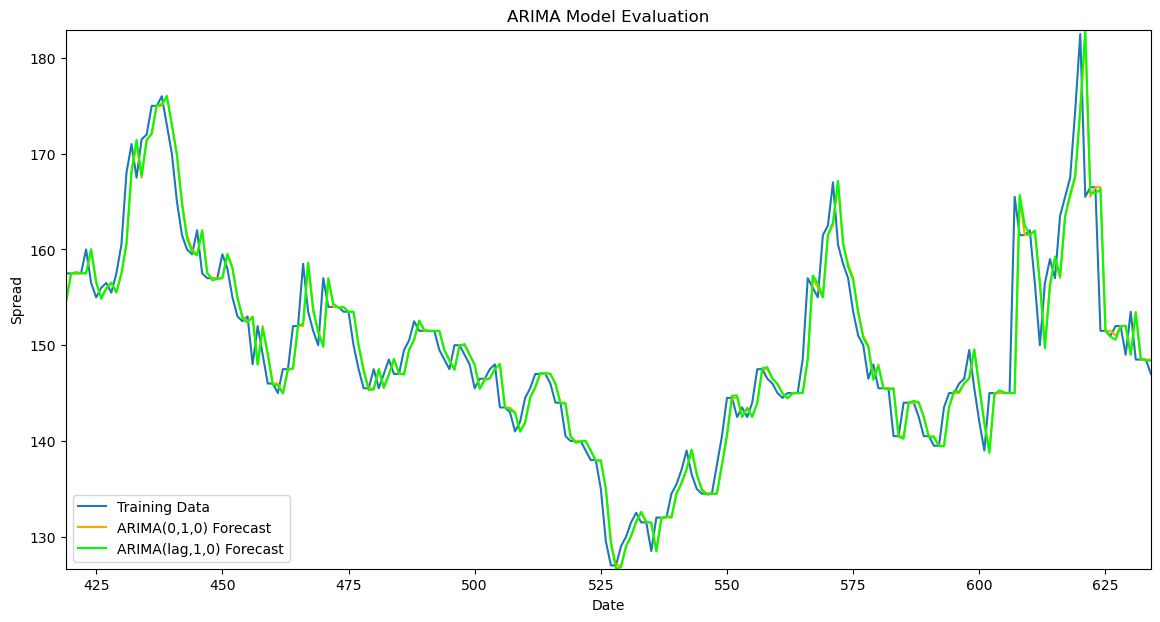


Evaluating column: India_220
Time interval:  2014-11-06 - 2023-06-07
India_220_2014-11-06 - 2023-06-07 ARIMA(0,1,0) Metrics:
RMSE: 1.8610, MAE: 0.9829, MAPE: 0.7596
India_220_2014-11-06 - 2023-06-07 ARIMA(3,1,0) Metrics:
RMSE: 1.8078, MAE: 1.0510, MAPE: 0.8152
Better model for India_220_2014-11-06 - 2023-06-07: ARIMA(0,1,0)


In [11]:
# Function to calculate MAPE
def mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Dictionaries to store fitted models and forecasts for each column
all_fitted_models = {}
all_forecasts = {}

# Create an empty DataFrame to store metrics
#metrics_df = pd.DataFrame(columns=['Column', 'Model', 'RMSE', 'MAE', 'MAPE'])
metrics_df = []

for company in df.columns[1:14]:
    print(company)
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        
        column = company ### 
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            #series = df[column]
            
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name

            # Function to evaluate and compare models
            start_index = series.first_valid_index()
            end_index = series.last_valid_index()
            series = series.loc[start_index:end_index]
            series = series.reset_index(drop=True)
            size = int(len(series) * 0.66)
            train, test = series[0:size], series[size:len(series)]
            history = [x for x in train]


            rw_predictions = list()
            arima_predictions = list()
            test_data = list(test)

            # Walk-forward validation
            for t in range(len(test)):
                # Evaluate ARIMA(0,1,0) model
                rw_model = ARIMA(history, order=(0, 1, 0))
                rw_model_fit = rw_model.fit()
                rw_output = rw_model_fit.forecast()
                rw_yhat = rw_output[0]
                rw_predictions.append(rw_yhat)

                # Evaluate ARIMA(x,1,0) model
                lag = chosen_lags.get(column, 1)  # Default lag is 1 if not found in dictionary
                arima_model = ARIMA(history, order=(lag, 1, 0))
                arima_model_fit = arima_model.fit()
                arima_output = arima_model_fit.forecast()
                arima_yhat = arima_output[0]
                arima_predictions.append(arima_yhat)

                obs = test[t+len(train)]
                history.append(obs)

            # Evaluate forecasts
            rw_rmse = sqrt(mean_squared_error(test, rw_predictions))
            arima_rmse = sqrt(mean_squared_error(test, arima_predictions))
            rw_mae = mean_absolute_error(test, rw_predictions)
            arima_mae = mean_absolute_error(test, arima_predictions)
            rw_mape = mape(test, rw_predictions)
            arima_mape = mape(test, arima_predictions)

            # Inside the compare_models function, after calculating metrics
            metrics_df.append({
                'Column': column_name,
                'Interval': interval_name,
                'Model': 'ARIMA(0,1,0)',
                'RMSE': rw_rmse,
                'MAE': rw_mae,
                'MAPE': rw_mape
            })

            metrics_df.append({
                'Column': column_name,
                'Interval': interval_name,
                'Model': f'ARIMA({lag},1,0)',
                'RMSE': arima_rmse,
                'MAE': arima_mae,
                'MAPE': arima_mape
            })

            # Compare models
            rw_better_count = 0
            arima_better_count = 0

            if rw_rmse < arima_rmse:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_mae < arima_mae:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_mape < arima_mape:
                rw_better_count += 1
            else:
                arima_better_count += 1

            if rw_better_count > arima_better_count:
                better_model = "ARIMA(0,1,0)"
            elif arima_better_count > rw_better_count:
                better_model = f"ARIMA({lag},1,0)"
            else:
                better_model = "No clear winner"
                
            # Print forecast metrics
            print("Time interval:  " + interval_name)
            print(f"{column_name} ARIMA(0,1,0) Metrics:")
            print(f"RMSE: {rw_rmse:.4f}, MAE: {rw_mae:.4f}, MAPE: {rw_mape:.4f}")
            print(f"{column_name} ARIMA({lag},1,0) Metrics:")
            print(f"RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, MAPE: {arima_mape:.4f}")
            print(f"Better model for {column_name}: {better_model}")

            
            # Store fitted models and forecasts for the current columns
            fitted_models = {'rw_model': rw_model_fit, 'arima_model': arima_model_fit}
            forecasts = {'rw_predictions': rw_predictions, 'arima_predictions': arima_predictions, 'test_data': test_data}
            all_fitted_models[column_name] = fitted_models
            all_forecasts[column_name] = forecasts

            # Create a plot to compare the forecast with the actual test data
            plt.figure(figsize=(14, 7))
            plt.plot(series, label='Training Data')
            # Create Series objects for the predictions
            test_forecast_series_rw = pd.Series(rw_predictions, index=test.index)
            test_forecast_series_arima = pd.Series(arima_predictions, index=test.index)
            # Determine the relevant range for zooming
            x_min, x_max = test.index.min(), test.index.max()
            y_min, y_max = min(test.min(), test_forecast_series_rw.min(), test_forecast_series_arima.min()), max(test.max(), test_forecast_series_rw.max(), test_forecast_series_arima.max())
            # Plot the data
            plt.plot(test_forecast_series_rw, label='ARIMA(0,1,0) Forecast', color='orange')
            plt.plot(test_forecast_series_arima, label='ARIMA(lag,1,0) Forecast', color='lime')
            # Zoom in on the relevant range
            plt.xlim(x_min, x_max)
            plt.ylim(y_min, y_max)
            plt.title('ARIMA Model Evaluation')
            plt.xlabel('Date')
            plt.ylabel('Spread')
            plt.legend()
            plt.show()
            
            strartinterval = intervalindex ####

In [12]:
metrics_df = pd.DataFrame(metrics_df)

In [13]:
# After the loop over columns

# Create an empty dictionary to store the reshaped data
reshaped_data = {}

# Loop through each column name (series) in all_forecasts
for column_name, forecasts in all_forecasts.items():
    # Unpack the forecasts for the current column
    rw_predictions, arima_predictions, test_data = forecasts['rw_predictions'], forecasts['arima_predictions'], forecasts['test_data']
    # Create a DataFrame for the current column
    column_df = pd.DataFrame({
        'index': range(len(rw_predictions)),
        f'rw_predictions_{column_name}': rw_predictions,
        f'arima_predictions_{column_name}': arima_predictions,
        f'test_data_{column_name}': test_data
    })

    # Append the DataFrame to the reshaped_data dictionary
    for col in column_df.columns:
        reshaped_data[col] = column_df[col]

In [15]:
forecasts_df = pd.DataFrame(reshaped_data)

# Export the DataFrame to an Excel file
forecasts_df.to_excel('Interval_forecasts_India.xlsx', index=False) ### country

In [14]:
# After the loop over columns
# Export the metrics DataFrame to an Excel file
metrics_df.to_excel('Interval_metrics_India.xlsx', index=False) ### country

In [16]:
# Export model summaries from all_fitted_models to a Word file
document = docx.Document()
for column_name, models in all_fitted_models.items():
    document.add_heading(f'Column: {column_name}', level=0)
    rw_model_fit = models['rw_model']
    arima_model_fit = models['arima_model']
    lag = chosen_lags.get(column_name, 1)

    document.add_heading('ARIMA(0,1,0) Summary:', level=1)
    document.add_paragraph(str(rw_model_fit.summary()))

    document.add_heading(f'ARIMA({lag},1,0) Summary:', level=1)
    document.add_paragraph(str(arima_model_fit.summary()))

document.save('Interval_model_summaries_India.docx') ### country

In [8]:
# Applying unit root tests to the data

from arch.unitroot import KPSS
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import ZivotAndrews

In [10]:
# Create an empty list to store the KPSS test results
kpss_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform KPSS test for the current segment
            lag_value = chosen_lags[column]
            kpss = KPSS(series, lags=lag_value)
            print(f"Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for '{column_name}':")
            print(kpss.summary().as_text())
            
            # Store the KPSS test result
            kpss_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'KPSS_Statistic': kpss.stat,
                'KPSS_p-value': kpss.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if kpss.pvalue > 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_8_2010-01-01 - 2018-02-16':
    KPSS Stationarity Test Results   
Test Statistic                 13.256
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_8
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_8_2018-02-16 - 2020-03-17':
    KPSS Stationarity Test Results   
Test Statistic                  6.366
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_8
Kwiatkowski-Ph

    KPSS Stationarity Test Results   
Test Statistic                  8.988
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_220
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_220_2010-01-01 - 2012-05-31':
    KPSS Stationarity Test Results   
Test Statistic                  8.769
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

Evaluating column: India_220
Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for 'India_220_2012-05-31 - 2014-11-06':
    KPSS Stationarity Test Results

In [11]:
# Create an empty list to store the ADF test results
adf_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform ADF test for the current segment
            lag_value = chosen_lags[column]
            adf = ADF(series, lags=lag_value)
            print(f"Augmented Dickey-Fuller (ADF) test for '{column_name}':")
            print(adf.summary().as_text())
            
            # Store the ADF test result
            adf_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'KPSS_Statistic': adf.stat,
                'KPSS_p-value': adf.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if adf.pvalue <= 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
Augmented Dickey-Fuller (ADF) test for 'India_8_2010-01-01 - 2018-02-16':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.823
P-value                         0.369
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
Augmented Dickey-Fuller (ADF) test for 'India_8_2018-02-16 - 2020-03-17':
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.397
P-value                         0.584
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
Augmented Dickey-Fuller (ADF) 

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.015
P-value                         0.033
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_199
Augmented Dickey-Fuller (ADF) test for 'India_199_2015-06-25 - 2024-01-18':
   Augmented Dickey-Fuller Results   
Test Statistic                 -3.645
P-value                         0.005
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_206
Augmented Dickey-Fuller (ADF) test for 'India_206_2010-01-01 - 2011-10-07':
   Augmented Dickey-Fuller Results   
Test Statist

In [12]:
# Create an empty list to store the PP test results
pp_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform PP test for the current segment
            lag_value = chosen_lags[column]
            pp = PhillipsPerron(series, lags=lag_value)
            print(f"PhillipsPerron (PP) test for '{column_name}':")
            print(pp.summary().as_text())
            
            # Store the ADF test result
            pp_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'PP_Statistic': pp.stat,
                'PP_p-value': pp.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if pp.pvalue <= 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2010-01-01 - 2018-02-16':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.653
P-value                         0.455
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2018-02-16 - 2020-03-17':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.017
P-value                         0.747
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_8
PhillipsPerron (PP) test for 'India_8_2020-03-17 -

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.528
P-value                         0.109
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_136
PhillipsPerron (PP) test for 'India_136_2010-01-01 - 2013-11-14':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.325
P-value                         0.164
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Evaluating column: India_136
PhillipsPerron (PP) test for 'India_136_2013-11-14 - 2016-01-01':
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -

In [13]:
# Create an empty list to store the ZA test results
za_results = []

stationary_count = 0
total_segments = 0

for company in df.columns[1:14]:
    shortcol = df[[company, "Date"]].dropna().reset_index()
    intervals = list(breaksdf2[company].dropna())
    intervals.append(shortcol.iloc[-1]["Date"])
    
    strartinterval = 0
    
    # Iterate over columns and compare models
    for interval in range(len(intervals)):
        if (intervals[interval] in list(shortcol["Date"])) is False:
            continue
        
        column = company
        if column in chosen_lags:
            print(f"\nEvaluating column: {column}")
            
            intervalindex = int(shortcol[shortcol['Date'] == intervals[interval]].index.values)
            series = shortcol[strartinterval:intervalindex][company]
            
            interval_name = str(shortcol["Date"][strartinterval])[:10] + " - " + str(intervals[interval])[:10]
            column_name = column + "_" + interval_name
            
            # Perform ZA test for the current segment
            lag_value = chosen_lags[column]
            za = ZivotAndrews(series, lags=lag_value)
            print(f"ZivotAndrews (ZA) test for '{column_name}':")
            print(za.summary().as_text())
            
            # Store the ZA test result
            za_results.append({
                'Column': column_name,
                'Interval': interval_name,
                'PP_Statistic': za.stat,
                'PP_p-value': za.pvalue
            })
            
            # Update the stationarity count
            total_segments += 1
            if za.pvalue <= 0.05:
                stationary_count += 1
            
            strartinterval = intervalindex

stationary_percentage = (stationary_count / total_segments) * 100
non_stationary_percentage = 100 - stationary_percentage

print(f"\nPercentage of stationary segments: {stationary_percentage:.2f}%")
print(f"Percentage of non-stationary segments: {non_stationary_percentage:.2f}%")


Evaluating column: India_8
ZivotAndrews (ZA) test for 'India_8_2010-01-01 - 2018-02-16':
        Zivot-Andrews Results        
Test Statistic                 -4.545
P-value                         0.106
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

Evaluating column: India_8
ZivotAndrews (ZA) test for 'India_8_2018-02-16 - 2020-03-17':
        Zivot-Andrews Results        
Test Statistic                 -2.485
P-value                         0.985
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

E

        Zivot-Andrews Results        
Test Statistic                 -5.135
P-value                         0.019
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

Evaluating column: India_153
ZivotAndrews (ZA) test for 'India_153_2010-01-01 - 2013-11-18':
        Zivot-Andrews Results        
Test Statistic                 -4.150
P-value                         0.265
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

Evaluating column: India_153
ZivotAndrews (ZA) test for 'India_153_2013-11-18 - 2015-12

        Zivot-Andrews Results        
Test Statistic                 -5.738
P-value                         0.002
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -5.28 (1%), -4.81 (5%), -4.57 (10%)
Null Hypothesis: The process contains a unit root with a single structural break.
Alternative Hypothesis: The process is trend and break stationary.

Percentage of stationary segments: 30.00%
Percentage of non-stationary segments: 70.00%
